In [1]:
# Do not edit this cell

# course: 3654
# a: Homework 6
# d: VT

# Homework 6

**Enter your Name:**  Phillip McDonough
    
**Enter your PID:**  906263051
    
I have neither given nor received unauthorized assistance on this assignment. See the course sylabus for details on the Honor Code policy. In particular, sharing lines of solution code is prohibited.

In [2]:
# Run this cell first.  Do NOT edit this cell (but you can uncomment the %matplotlib inline command for testing).
Answer1 = Answer2 = Answer3 = Answer4 = Answer5 = dist = None
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
table = pd.read_csv('CS3654-FA21-survey-clean.csv') 
table.shape

(106, 25)

**Problem 1. (20 points)** Define a distance function, called *dist(i,j)*, that returns the L1 distance  between any two given students in the z-score normalized survey data. For quantitative columns, use z-score normalized data (do not include the Name column in the distance metric). You must write your own code for this metric, you cannot use a library method that computes distances.  Parameters i & j are indices of rows in the original table, and the function returns a float.  For example, the dist between the first two people (Zain and Nayana) is 18.101287476985082.  Return your distance function in Answer1.  If you return the function successfully, the cell should print something like "<function \_\_main\_\_.dist(i, j)>".

In [3]:
# Problem 1
# Insert your work here

zDF = (table.iloc[:,2:] - table.iloc[:,2:].mean()) / table.iloc[:,2:].std()

def dist(i,j):
    student1 = zDF.iloc[i,:]
    student2 = zDF.iloc[j,:]
    return (student1-student2).abs().sum()

Answer1 = dist
Answer1

<function __main__.dist(i, j)>

**Problem 2. (20 points)** Compute the n x n distance matrix over all pairs of people in the survey, using your distance function from Problem 1. The matrix should be in the same row order as the data file. Represent the distance matrix as a pd.DataFrame(dtype=float,...). You may need to consider the efficiency of your dist() solution and your matrix computation, but don't worry if it takes ~10 seconds or so to run.  Return the matrix as Answer2.

In [4]:
# Problem 2
# Insert your work here

Answer2 = pd.DataFrame(index=table.Name, columns=table.Name)

for i in zDF.index:
    for j in zDF.index:
        Answer2.iloc[i,j] = dist(i,j)

Answer2

Name,Zain,Nayana,Crystal,Ashwin,Hyesoo,Tashi,Philip,Timothy,Nick,John Dugan,...,Megan,Nick Casale,Ariel,Alan,Phillip,John D,Raymond,Renny1111,Jordan,John
Name,,,,,,,,,,,,,,,,,,,,,
Zain,0,18.1013,24.2568,15.5036,27.9723,14.7264,18.3126,20.7377,11.8824,12.4951,...,17.4977,13.6527,19.1052,11.7072,16.0143,28.5665,22.0801,14.7887,31.4562,44.5435
Nayana,18.1013,0,21.0731,23.9147,27.7681,17.7458,23.7186,32.5609,14.9235,20.5471,...,25.8957,19.4454,27.8429,20.5978,19.895,35.2607,25.0488,18.0882,31.7231,52.3117
Crystal,24.2568,21.0731,0,22.561,27.5937,20.0986,17.8868,33.0372,23.3547,24.0247,...,18.6644,19.8314,25.4776,20.4689,27.6891,37.8355,25.5809,24.8229,31.5897,44.9844
Ashwin,15.5036,23.9147,22.561,0,31.599,19.0258,14.5719,25.3616,13.7354,18.0227,...,16.2007,14.2728,19.983,13.3481,25.2844,30.7521,20.6932,19.6428,30.5133,42.9456
Hyesoo,27.9723,27.7681,27.5937,31.599,0,27.9539,27.5183,28.6985,27.5662,26.4014,...,26.4829,28.0943,26.3897,24.1446,24.3239,41.872,28.5478,28.0197,40.069,51.8984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
John D,28.5665,35.2607,37.8355,30.7521,41.872,27.5797,34.3784,38.3441,30.7934,28.7718,...,32.2827,31.174,38.5193,29.7153,29.0405,0,42.5987,26.0782,38.2623,54.4449
Raymond,22.0801,25.0488,25.5809,20.6932,28.5478,23.5716,22.5692,22.9758,20.6803,21.4923,...,23.5914,28.2659,21.4586,18.9953,26.5178,42.5987,0,25.8618,39.506,45.4941
Renny1111,14.7887,18.0882,24.8229,19.6428,28.0197,14.8185,18.816,24.2975,15.3575,20.4871,...,18.2847,20.3004,27.156,17.2396,15.1623,26.0782,25.8618,0,23.4981,46.011


**Problem 3. (20 points)**  Who are the closest and farthest pairs of people?  Hints: use NaN on the matrix diagonal to eliminate the 0 self distances from consideration; note the distinction between the min() and idxmin() functions. 

In Answer3, return the result in the following tuple of tuples form:

`((name1, name2, distance12),   # closest pair, name1 < name2 (alphabetized)
 (name3, name4, distance34))   # farthest pair, name3 < name4 (alphabetized)`

*Think & Try: Who is most like you?*

In [5]:
# Problem 3
# Insert your work here
nanDF = Answer2.copy()
np.fill_diagonal(nanDF.values, np.NaN)

min_pair = [nanDF.min().idxmin(), nanDF[nanDF.loc[nanDF.min().idxmin()] == nanDF.min().min()].index[0]]
min_pair.sort()

max_pair = [nanDF.max().idxmax(), nanDF[nanDF.loc[nanDF.max().idxmax()] == nanDF.max().max()].index[0]]
max_pair.sort()

closest = (min_pair[0], min_pair[1], nanDF.loc[min_pair[0], min_pair[1]])
farthest = (max_pair[0], max_pair[1], nanDF.loc[max_pair[0], max_pair[1]])

Answer3 = (closest, farthest)
Answer3

(('Eshan', 'Zain', 7.626526268401079), ('John', 'Jordan', 59.45235143698092))

**Problem 4. (20 points)** Who is most/least like everyone else, based on the mean of each person's distances to all others? Do not include the 0 self distances in the mean computations. (Hint: Series.argsort() might be useful.)  In Answer4, return a list of Names, sorted in order of nearness to everyone else, from nearest to farthest.

In [6]:
# Problem 4
# Insert your work here 

means = nanDF.mean().argsort()
Answer4 = [means.index[i] for i in means]
Answer4

['Rami',
 'Jason',
 'Ian',
 'Pranav',
 'Zain',
 'Gaurav',
 'Sam',
 'McKenna',
 'Eshan',
 'Grant',
 'Ishan',
 'Alan',
 'Kyle',
 'Brad',
 'Alex',
 'Sania',
 'Nick',
 'John Dugan',
 'Nick',
 'Ali',
 'Mystery87541',
 'Jared Orendorff',
 'Andrew',
 'Nadine',
 'Cecilia',
 'Raphael',
 'Colin',
 'Ian',
 'Nicole',
 'Jiale',
 'Jay',
 'Kaitlyn',
 'Mystery54321',
 'Renny1111',
 'Derek',
 'Maxfield',
 'Trey',
 'Jacob',
 'Michael',
 'Philip',
 'Mystery20018',
 'Nikhil',
 'Arjun',
 'Elizabeth Morin',
 'Aparna',
 'Nick Casale',
 'Ashwin',
 'Joseph Wu',
 'Tashi',
 'Logan',
 'Mihir',
 'Daniel Petrenko',
 'Hanxuan',
 'Isabelle',
 'Mystery53242',
 'Cathy',
 'Quinn',
 'Phillip',
 'Henry',
 'Megan',
 'Caleb',
 'Tyler Hill',
 'Michael C.',
 'Jackson',
 'Luke',
 'Mystery12345',
 'Emma',
 'Mystery69420',
 'Casey',
 'Nayana',
 'Patrick',
 'Depeng',
 'Esha',
 'Pranav',
 'Alberto',
 'Lilly',
 'David',
 'Varun Choudhary',
 'Sharanya',
 'Crystal',
 'Kajal Desai',
 'Daniel Sabanov',
 'Isaiah',
 'Ariel',
 'Smith',
 '

**Problem 5. (20 points)** Visualize the distribution of all n^2 distances, including the 0 self distances, as an appropriately labeled KDE plot (kernel density estimation plot https://en.wikipedia.org/wiki/Kernel_density_estimation). Hint: flatten() might be useful. Where is the peak of the most dense portion of the distribtion? Hint: find the plot's curve data in Axes.lines\[0\].get_xydata( ) or similar.  Show the plot here, and return a tuple in Answer5 containing: (plot Axes, distance value corresponding to the KDE peak)

(<AxesSubplot:title={'center':'Distribution of all n^2 Distances'}, ylabel='Density'>,
 20.739884360147997)

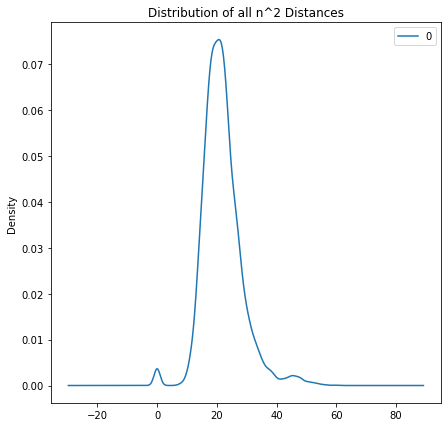

In [7]:
# Problem 5
# Insert your work here

kde_plot = pd.DataFrame(Answer2.copy().values.flatten())
kde_plot = kde_plot.plot.kde(figsize=(7,7), title="Distribution of all n^2 Distances")

curve_data = kde_plot.lines[0].get_xydata()
peak_density = max(curve_data[:,1])
peak_distance = float(curve_data[curve_data[:,1] == peak_density, 0])
Answer5 = (kde_plot, peak_distance)
Answer5

In [8]:
# scratch space
